In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("Data.csv")

In [3]:
df

,LEFT-WEIGHT,LEFT_DISTANCE,RIGHT_WEIGHT,RIGHT_DISTANCE,CLASS_NAME
0,1,1,1,1,B
1,1,1,1,2,R
2,1,1,1,3,R
3,1,1,1,4,R
4,1,1,1,5,R
...,...,...,...,...,...
620,5,5,5,1,L
621,5,5,5,2,L
622,5,5,5,3,L
623,5,5,5,4,L


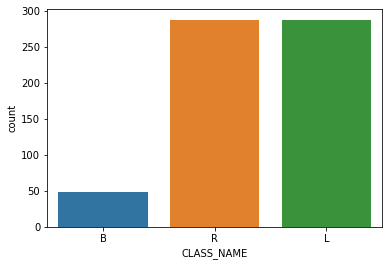

In [15]:
sns.countplot(df["CLASS_NAME"], data=df)

In [4]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [10]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
sc = StandardScaler()
le = LabelEncoder()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [29]:
def models(X_train, Y_train):

    # Using Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, Y_train)

    # Using KNeighborsClassifier
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
    knn.fit(X_train, Y_train)

    # Using SVC linear
    from sklearn.svm import SVC
    svc_lin = SVC(kernel='linear', probability=True ,random_state=0)
    svc_lin.fit(X_train, Y_train)

    # Using SVC rbf
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel='rbf', probability=True, random_state=0)
    svc_rbf.fit(X_train, Y_train)

    # Using GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)

    # Using DecisionTreeClassifier
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
    tree.fit(X_train, Y_train)

    # Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(
        n_estimators=10, criterion='entropy', random_state=0)
    forest.fit(X_train, Y_train)

    # print model accuracy on the training data.
    print('[0]Logistic Regression Training Accuracy:',
          log.score(X_train, Y_train))
    print('[1]K Nearest Neighbor Training Accuracy:',
          knn.score(X_train, Y_train))
    print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:',
          svc_lin.score(X_train, Y_train))
    print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:',
          svc_rbf.score(X_train, Y_train))
    print('[4]Gaussian Naive Bayes Training Accuracy:',
          gauss.score(X_train, Y_train))
    print('[5]Decision Tree Classifier Training Accuracy:',
          tree.score(X_train, Y_train))
    print('[6]Random Forest Classifier Training Accuracy:',
          forest.score(X_train, Y_train))

    return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [30]:
model = models(x_train, y_train)

[0]Logistic Regression Training Accuracy: 0.862
[1]K Nearest Neighbor Training Accuracy: 0.858
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.916
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.914
[4]Gaussian Naive Bayes Training Accuracy: 0.892
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.994


In [31]:
from sklearn.model_selection import cross_val_score

def scores(X_train, y_train):
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression()
    log_scores =  cross_val_score(log, X_train, y_train, cv=10)
    
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier()
    knn_scores = cross_val_score(knn, X_train, y_train, cv=10)


    from sklearn.svm import SVC
    svm_lin = SVC(kernel="linear")
    svm_lin_scores = cross_val_score(svm_lin, X_train, y_train, cv=10)

    from sklearn.svm import SVC
    svm_rbf = SVC(kernel='rbf')
    svm_rbf_scores = cross_val_score(svm_rbf, X_train, y_train, cv=10)

    from sklearn.naive_bayes import GaussianNB
    gauss = KNeighborsClassifier()
    gauss_scores = cross_val_score(gauss, X_train, y_train, cv=10)

    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier()
    tree_scores = cross_val_score(tree, X_train, y_train, cv=10)

    from sklearn.ensemble import RandomForestClassifier
    forest= RandomForestClassifier()
    forest_scores = cross_val_score(forest, X_train, y_train, cv=10)

    print('[0]Logistic Regression Training Scores:', log_scores.mean())
    print('[1]K Nearest Neighbor Training Scores:', knn_scores.mean())
    print('[2]Support Vector Machine (Linear Classifier) Training Scores:', svm_lin_scores.mean())
    print('[3]Support Vector Machine (RBF Classifier) Training Scores:', svm_rbf_scores.mean())
    print('[4]Gaussian Naive Bayes Training Scores:', gauss_scores.mean())
    print('[5]Decision Tree Classifier Training Scores:', tree_scores.mean())
    print('[6]Random Forest Classifier Training Scores:', forest_scores.mean())
  
    return log_scores, knn_scores, svm_lin_scores, svm_rbf_scores, gauss_scores, tree_scores, forest_scores


In [32]:
score = scores(x_train, y_train)

[0]Logistic Regression Training Scores: 0.8540000000000001
[1]K Nearest Neighbor Training Scores: 0.808
[2]Support Vector Machine (Linear Classifier) Training Scores: 0.916
[3]Support Vector Machine (RBF Classifier) Training Scores: 0.882
[4]Gaussian Naive Bayes Training Scores: 0.808
[5]Decision Tree Classifier Training Scores: 0.7859999999999999
[6]Random Forest Classifier Training Scores: 0.8119999999999999


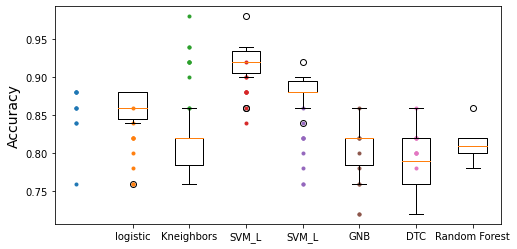

In [33]:
plt.figure(figsize=(8, 4))
plt.plot([0]*10, score[0], ".")
plt.plot([1]*10, score[1], ".")
plt.plot([2]*10, score[2], ".")
plt.plot([3]*10, score[3], ".")
plt.plot([4]*10, score[4], ".")
plt.plot([5]*10, score[5], ".")
plt.plot([6]*10, score[6], ".")
plt.boxplot([score[0], score[1], score[2],score[3],score[4],score[5],score[6]], labels=("logistic", "Kneighbors","SVM_L","SVM_L","GNB","DTC","Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

In [34]:
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
  cm = confusion_matrix(y_test, model[i].predict(x_test))
  
  TN = cm[0][0]
  TP = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]
  
  print(cm)
  print('Model[{}] Testing Accuracy = "{}!"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
  print()

[[ 0  0  4]
 [ 0 64  6]
 [ 0  1 50]]
Model[0] Testing Accuracy = "1.0!"

[[ 0  0  4]
 [ 8 60  2]
 [ 3  1 47]]
Model[1] Testing Accuracy = "0.8823529411764706!"

[[ 3  0  1]
 [ 5 64  1]
 [ 2  1 48]]
Model[2] Testing Accuracy = "0.9305555555555556!"

[[ 0  0  4]
 [ 1 68  1]
 [ 0  0 51]]
Model[3] Testing Accuracy = "0.9855072463768116!"

[[ 0  0  4]
 [ 0 65  5]
 [ 0  1 50]]
Model[4] Testing Accuracy = "1.0!"

[[ 0  1  3]
 [10 56  4]
 [ 8  0 43]]
Model[5] Testing Accuracy = "0.835820895522388!"

[[ 0  0  4]
 [ 6 61  3]
 [ 5  1 45]]
Model[6] Testing Accuracy = "0.9104477611940298!"



In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
  print('Model ',i)
  #Check precision, recall, f1-score
  print( classification_report(y_test, model[i].predict(x_test)) )
  #Another way to get the models accuracy on the test data
  print( accuracy_score(y_test, model[i].predict(x_test)))
  print()

Model  0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.98      0.91      0.95        70
           2       0.83      0.98      0.90        51

    accuracy                           0.91       125
   macro avg       0.61      0.63      0.62       125
weighted avg       0.89      0.91      0.90       125

0.912

Model  1
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.98      0.86      0.92        70
           2       0.89      0.92      0.90        51

    accuracy                           0.86       125
   macro avg       0.62      0.59      0.61       125
weighted avg       0.91      0.86      0.88       125

0.856

Model  2
              precision    recall  f1-score   support

           0       0.30      0.75      0.43         4
           1       0.98      0.91      0.95        70
           2       0.96      0.94 

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
y_pred = model[3].predict(x_test)

In [44]:
cm2 = confusion_matrix(y_test, y_pred)
cm2

array([[ 0,  0,  4],
       [ 1, 68,  1],
       [ 0,  0, 51]], dtype=int64)

# Creating DataFrames for results 



In [37]:
y_pred1 = y_pred.reshape(-1, 1)
y_test1 = y_test.reshape(-1, 1)

In [38]:
# Putting the predicted and test in the same numpy array
Collection = np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test1.reshape(len(y_test1),1)),1)
View = pd.DataFrame(Collection, columns=["Predicted", "Actual"])
View

,Predicted,Actual
0,1,1
1,2,2
2,1,1
3,2,2
4,1,1
...,...,...
120,1,1
121,2,2
122,1,1
123,1,1


# Actual values


In [42]:
Test1 = le.inverse_transform(y_pred1)
Test2 = le.inverse_transform(y_test1)
Collection2 = np.concatenate((Test1.reshape(len(Test1),1), Test2.reshape(len(Test2),1)),1)
View2 = pd.DataFrame(Collection2, columns=["Predicted", "Actual"])
View2

,Predicted,Actual
0,L,L
1,R,R
2,L,L
3,R,R
4,L,L
...,...,...
120,L,L
121,R,R
122,L,L
123,L,L


# Cumulative Frequncy Curve

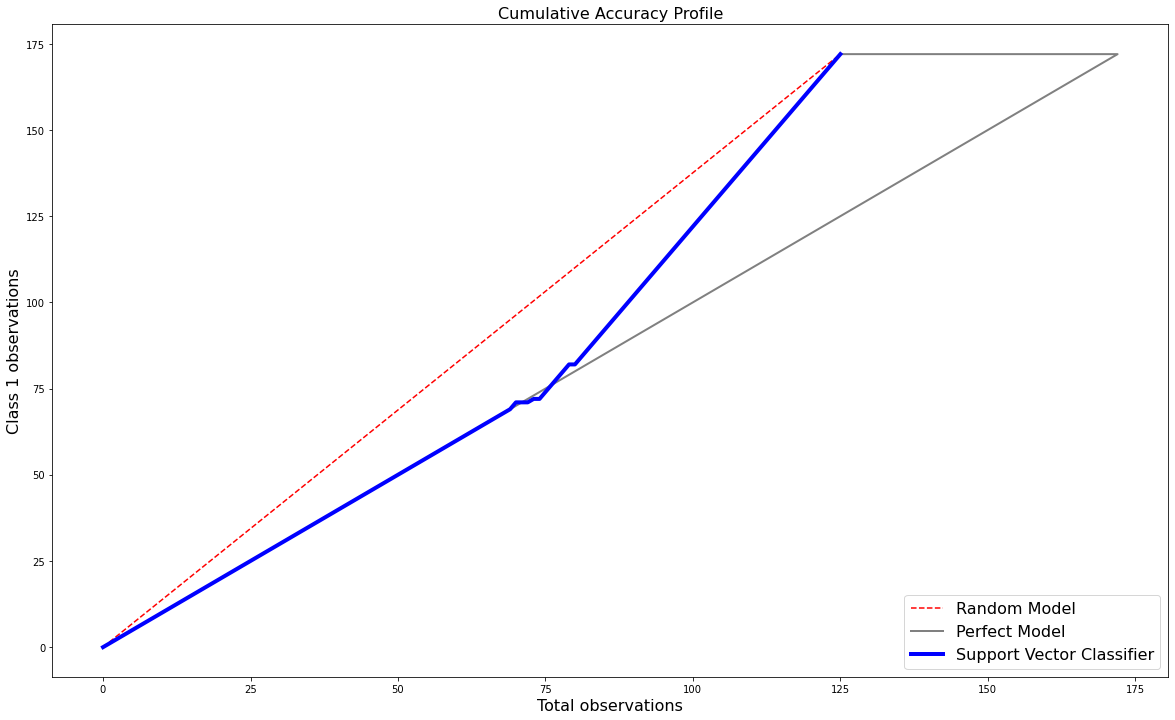

In [43]:
# Cumulative Frequency  Curve 

total =  len(y_test)
count_1 = np.sum(y_test)
count_0 = total - count_1
plt.figure(figsize=(20,12))

probs = model[3].predict_proba(x_test)
probs = probs[:, 1]
model_y = [y for _, y in sorted(zip(probs, y_test), reverse = True)]
y_values = np.append([0], np.cumsum(model_y))
x_values = np.arange(0, total + 1)

plt.plot([0, total], [0, count_1], c = 'r', linestyle = '--', label = 'Random Model')

plt.plot([0, count_1, total], 
         [0, count_1, count_1], 
         c = 'grey', 
         linewidth = 2, 
         label = 'Perfect Model')

plt.plot(x_values, 
         y_values, 
         c = 'b', 
         label = 'Support Vector Classifier', 
         linewidth = 4)

# Plot information
plt.xlabel('Total observations', fontsize = 16)
plt.ylabel('Class 1 observations', fontsize = 16)
plt.title('Cumulative Accuracy Profile', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)

# Finished